#WeatherPy - Analysis of Weather for randomly selected cities

##Observed Trends

#1: In the Temp vs. Lattitude, as you leave the poles and get close to equator, temperature rises.  It isn't the hottest at the equator but temp rises
#2. In Humid vs. Lattitude, there is no discernable difference in humidity between the lattitudes.  This could be because humidity relies on several factors besides location to equator.
#3. No significant correlation could be found between wind speed and cloudiness for cities around equator.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [7]:
## Random lat and lng
lat = []
lng = []
for x in range(0,1200):
    lat.append(random.uniform(-90,91))
    lng.append(random.uniform(-181,181))
    
lat_lngs = zip(lat,lng)

In [6]:
## Append random cities

cities = []
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

512

In [7]:
temp = []
humid = []
cloud = []
wind = []
cities_list = []
lat = []
lng = []
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

for city in cities:
    counter += 1
    query_url = f'{url}appid={api_key}&units={units}&q={city}'
    print("Processing " + str(counter) + ' out of ' + str(len(cities)) + ' | ' + (city))
    response = requests.get(query_url).json()
    try: 
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cities_list.append(response['name'])
        
    except (KeyError):
        print("missing city data...skipping")
        
    time.sleep(1)
    

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing 1 out of 512 | roma
Processing 2 out of 512 | beringovskiy
Processing 3 out of 512 | castro
Processing 4 out of 512 | yellowknife
Processing 5 out of 512 | narsaq
Processing 6 out of 512 | barrow
Processing 7 out of 512 | hilo
Processing 8 out of 512 | mataura
Processing 9 out of 512 | novoagansk
Processing 10 out of 512 | taolanaro
missing city data...skipping
Processing 11 out of 512 | vaini
Processing 12 out of 512 | sitka
Processing 13 out of 512 | severo-kurilsk
Processing 14 out of 512 | berlevag
Processing 15 out of 512 | barentsburg
missing city data...skipping
Processing 16 out of 512 | bethel
Processing 17 out of 512 | atuona
Processing 18 out of 512 | busselton
Processing 19 out of 512 | longyearbyen
Processing 20 out of 512 | carnarvon
Processing 21 out of 512 | abiy adi
missing city data...skipping
Processing 22 out of 512 | rikitea
Processing 23 out of 

In [12]:
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloud,
     'Humidity':humid,
     'Lat':lat,
     'Lng':lng,
     'Temperature':temp,
     'Wind Speed':wind,
     })
weather_df.head()

weather_df.to_csv("city_weather.csv")

,City,Cloudiness,Humidity,Lat,Lng,Temperature,Wind Speed
0,Rome,0,40,41.89,12.48,90.32,11.41
1,Beringovskiy,100,93,63.05,179.32,44.16,5.55
2,Castro,0,100,-42.48,-73.76,33.80,4.70
3,Yellowknife,75,67,62.45,-114.38,57.09,4.70
4,Narsaq,75,61,60.91,-46.05,50.00,5.82


Text(0, 0.5, 'Temperature')

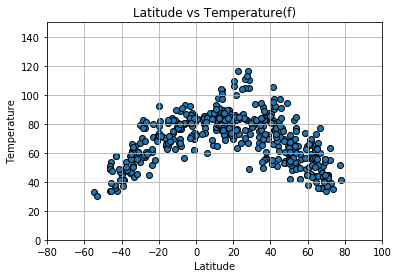

In [22]:
plt.scatter(weather_df['Lat'], weather_df['Temperature'], alpha = 1, edgecolors = 'black')
plt.ylim(0,150)
plt.xlim(-80,100)
plt.grid()
plt.title("Latitude vs Temperature(f)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Temp_Lat.png")

Text(0, 0.5, 'Humidity')

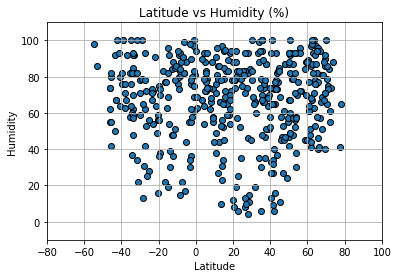

In [26]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], alpha = 1, edgecolors = 'black')
plt.ylim(-10,110)
plt.xlim(-80,100)
plt.grid()
plt.title("Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('Lat_Hum.png')

Text(0, 0.5, 'Cloudiness')

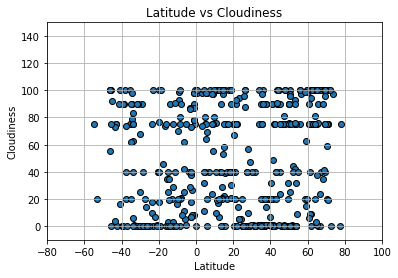

In [25]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], alpha = 1, edgecolors = 'black')
plt.ylim(-10,150)
plt.xlim(-80,100)
plt.grid()
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('Lat_Cloud.png')

Text(0, 0.5, 'Wind Speed')

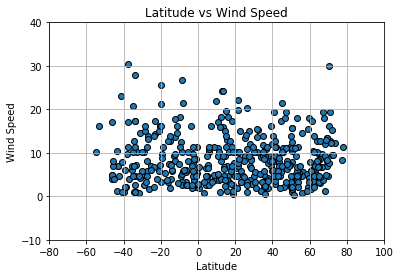

In [28]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], alpha = 1, edgecolors = 'black')
plt.ylim(-10,40)
plt.xlim(-80,100)
plt.grid()
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('Lat_Wind.png')